<a href="https://colab.research.google.com/github/DhanvinS/ML_Models-Supervised-and-Unsupervised/blob/main/Support%20Vector%20Machines/SVM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target
df.head()
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df[df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [12]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
from matplotlib import pyplot as plt

In [14]:
#create 3 dataframes separate 3 species into 3 separate dataframes
df0 = df[df['target']==0]
df1 = df[df['target']==1]
df2 = df[df['target']==2]

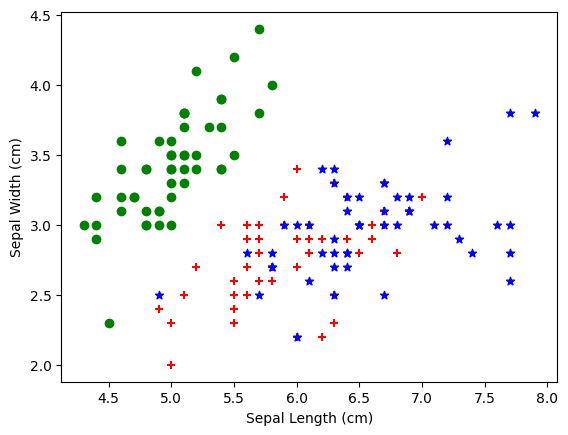

In [19]:
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'red', marker = '+')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'blue' , marker = '*')


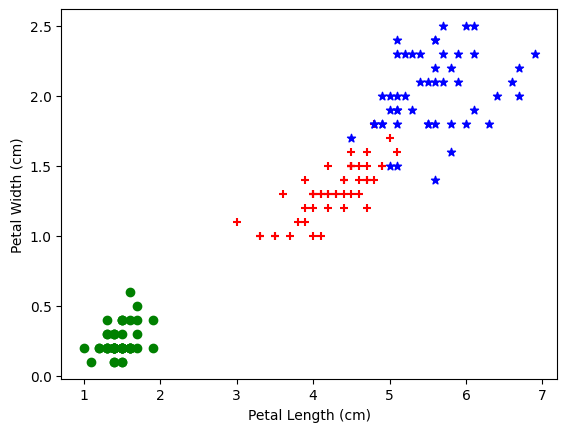

In [20]:
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'red', marker = '+')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'blue' , marker = '*')


In [21]:
from sklearn.model_selection import train_test_split

In [23]:
#drop target and flower name for training
X = df.drop(['target','flower_names'], axis='columns')
y = df.target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
len(X_train)

120

In [48]:
from sklearn.svm import SVC
model = SVC(gamma=1)
#can change value of c aka regularization incerasing regularization decreases score
#SVC(gamma=1)for changing gamma

Gamma in SVC controls how much influence a single training sample has: a low gamma means far-reaching influence and smoother decision boundaries, while a high gamma means each sample affects only its neighborhood, producing a more complex boundary that may overfit.​

Regularization (parameter C) controls the trade-off between having a smooth decision boundary and correctly classifying training points: low C favors a simpler boundary with more tolerance for errors (prevents overfitting), while high C pushes the model to fit all training data exactly, risking overfitting.

In [49]:
model.fit(X_train, y_train)

SVC(gamma=1)

In [50]:
model.score(X_test, y_test)

0.9666666666666667